In [ ]:
!pip install antigranular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 88.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.8/793.8 kB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.4/294.4 kB 56.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Not uninstalling requests at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'requests'. No files were found to uninstall.
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.2
    Not

In [ ]:
import antigranular as ag
session = ag.login('NQyXoE94tVoQZsIa+WtfAbZQJgif51nc','0nUYGusYxjdw+YvDVkTvguyoJeKbFgNeUpa+8g2OVLDyIzMejA04LUqGRZsI9k7x', competition = "UN Datathon PETs Track")

local_host_port: 780e914d-ba38-4939-bf7b-f290cdef0fa1
server_hostname: ip-100-100-16-103.eu-west-1.compute.internal
tls_cert_name: ip-100-100-16-103.eu-west-1.compute.internal_780e914d-ba38-4939-bf7b-f290cdef0fa1
Login failed. Please verify the competition name and your credentials. If issue persists, contact support. Error: Enclave Error: Error: HTTP status client error (400 Bad Request) for url (https://auth.antigranular.com/oauth/token)


In [ ]:
session.privacy_odometer()

AttributeError: 'NoneType' object has no attribute 'privacy_odometer'

In [ ]:
%%ag

undata_hh = load_dataset("undata_hh")
undata_hdds = load_dataset("undata_hdds")

In [ ]:
session.terminate_session()

NameError: name 'session' is not defined

In [ ]:
import pandas as pd

new_data = pd.read_csv('GFSI_2022.csv')

array([[<AxesSubplot: title={'center': 'Overall score'}>]], dtype=object)

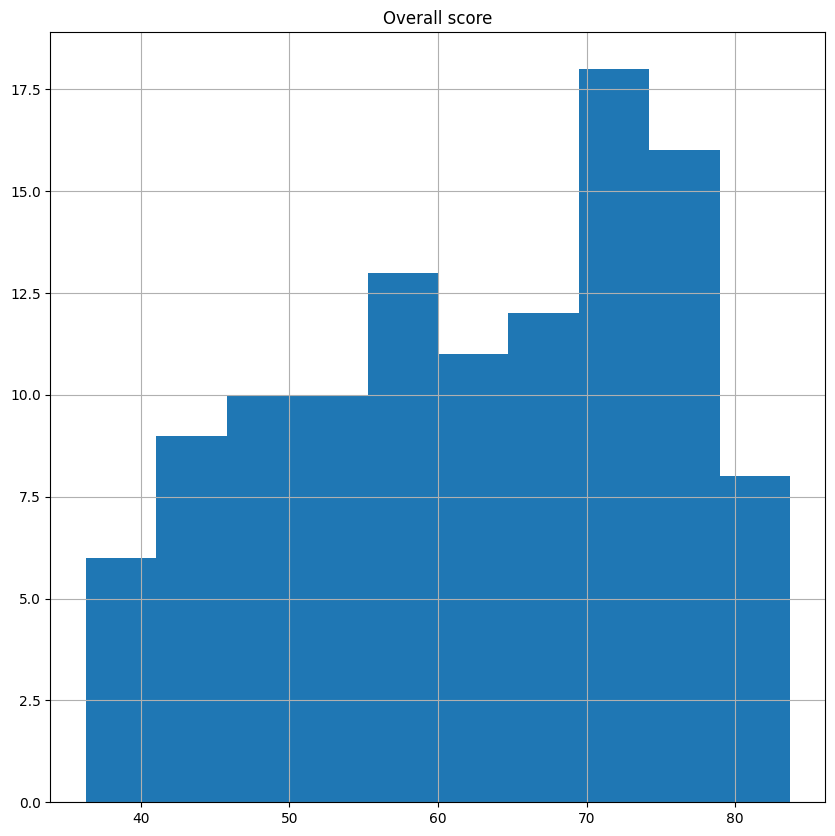

In [ ]:
new_data.hist('Overall score', figsize=[10,10])

In [ ]:
new_data['Overall score'].describe()

count    113.000000
mean      62.157522
std       12.663035
min       36.300000
25%       51.900000
50%       63.000000
75%       73.000000
max       83.700000
Name: Overall score, dtype: float64

In [ ]:
new_data.loc[(new_data['Overall score']<52), 'Overall']=0
new_data.loc[(new_data['Overall score']>=52)&(new_data['Overall score']<63), 'Overall']=1
new_data.loc[(new_data['Overall score']>=63)&(new_data['Overall score']<73), 'Overall']=2
new_data.loc[(new_data['Overall score']>=73)&(new_data['Overall score']<100), 'Overall']=3
new_data.Overall.astype(int)

0      3
1      3
2      3
3      3
4      3
      ..
108    0
109    0
110    0
111    0
112    0
Name: Overall, Length: 113, dtype: int64

In [ ]:
correlation=[]
features=['Affordability', 'Availability', 'Quality and Safety', 'Sustainability and Adaptation']
for feature in features:
  w=new_data[feature]
  z=new_data['Overall']
  r=w.corr(z,method='pearson')
  correlation.append(r)
corrdata={'Features':features, 'Correlation':correlation}
corrdata=pd.DataFrame(data=corrdata)
corrdata

,Features,Correlation
0,Affordability,0.893109
1,Availability,0.843147
2,Quality and Safety,0.889445
3,Sustainability and Adaptation,0.692496


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import copy

X = new_data[['Affordability', 'Availability', 'Quality and Safety']]
org_y = new_data['Overall']
y = copy.deepcopy(org_y)
X_train, X_dev_test, y_train, y_dev_test = train_test_split(X, y, test_size=0.2)
X_dev, X_test, y_dev, y_test = train_test_split(X_dev_test, y_dev_test, test_size=0.5)

Perceptron: 0.333333 (0.121716)
Linear SVM: 0.688889 (0.155556)
DT: 0.644444 (0.129577)
RF: 0.833333 (0.113855)
NN: 0.277778 (0.142725)
XG: 0.833333 (0.133795)


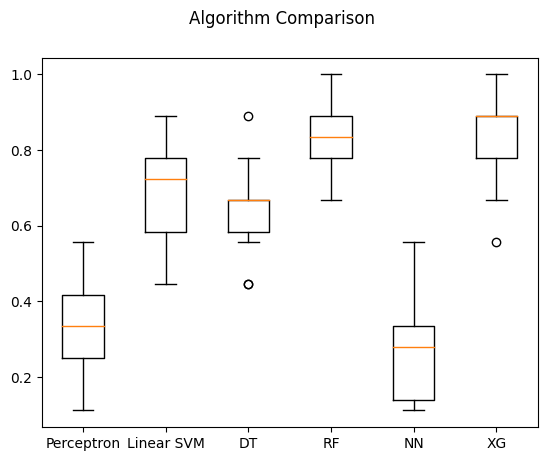

In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost

models = []
models.append(('Perceptron',Perceptron(random_state=0)))
models.append(('Linear SVM',  LinearSVC(random_state=0, dual=False, C=3,  tol=0.000001, max_iter=10000)))
models.append(('DT', DecisionTreeClassifier(random_state=0,max_depth=2)))
models.append(('RF', RandomForestClassifier(random_state=0,max_depth=3, n_estimators=14)))
models.append(('NN', MLPClassifier(random_state=0,hidden_layer_sizes=(10, 10, 10), max_iter=1000, alpha=1)))
models.append(('XG', xgboost.XGBClassifier(random_state=0,max_depth=2)))



# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=0, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
scores = []
k_range = range(1, 50)
for k in k_range:
#train model with cv of 10
    RF_cv = RandomForestClassifier(max_depth=3, n_estimators=k)
    cv_scores = cross_val_score(RF_cv, X, np.ravel(y,order='C'), cv=10)
#print each cv score (accuracy) and average them
    print(k)
    print(cv_scores)
    print(np.mean(cv_scores))

1
[0.41666667 0.41666667 0.83333333 0.72727273 0.81818182 0.81818182
 0.63636364 0.81818182 0.45454545 0.72727273]
0.6666666666666666
2
[0.66666667 0.83333333 0.91666667 0.72727273 0.63636364 0.81818182
 0.72727273 0.81818182 0.63636364 0.81818182]
0.759848484848485
3
[0.33333333 0.66666667 0.83333333 1.         0.81818182 1.
 1.         0.63636364 0.90909091 0.72727273]
0.7924242424242425
4
[0.5        0.83333333 0.91666667 0.63636364 0.72727273 0.81818182
 0.90909091 0.90909091 1.         0.72727273]
0.7977272727272727
5
[0.5        0.75       0.58333333 1.         0.81818182 1.
 0.90909091 0.81818182 0.63636364 0.72727273]
0.7742424242424243
6
[0.75       0.66666667 0.83333333 1.         0.81818182 0.81818182
 0.72727273 0.81818182 1.         0.90909091]
0.834090909090909
7
[0.58333333 0.91666667 0.91666667 1.         0.72727273 0.90909091
 0.81818182 0.90909091 0.72727273 0.81818182]
0.8325757575757574
8
[0.41666667 0.83333333 0.91666667 1.         0.81818182 0.90909091
 0.90909091

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
import xgboost
scores = []
k_range = range(1, 60)
for k in k_range:
#train model with cv of 10
    DT_cv = xgboost.XGBClassifier(max_depth=k)
    cv_scores = cross_val_score(DT_cv, X, np.ravel(y,order='C'), cv=10)
#print each cv score (accuracy) and average them
    print(k)
    print(cv_scores)
    print(np.mean(cv_scores))

1
[0.58333333 0.75       0.91666667 1.         0.90909091 0.90909091
 0.81818182 0.90909091 0.72727273 0.81818182]
0.834090909090909
2
[0.66666667 0.91666667 0.91666667 1.         0.72727273 0.81818182
 0.90909091 0.90909091 0.72727273 0.90909091]
0.85
3
[0.58333333 0.75       0.91666667 1.         0.81818182 0.81818182
 1.         0.90909091 0.81818182 0.81818182]
0.8431818181818181
4
[0.58333333 0.75       0.83333333 1.         0.81818182 0.81818182
 1.         0.90909091 0.81818182 0.72727273]
0.8257575757575758
5
[0.5        0.75       0.83333333 1.         0.81818182 0.81818182
 1.         0.90909091 0.81818182 0.72727273]
0.8174242424242424
6
[0.5        0.75       0.83333333 1.         0.81818182 0.81818182
 1.         0.90909091 0.81818182 0.72727273]
0.8174242424242424
7
[0.5        0.75       0.83333333 1.         0.81818182 0.81818182
 1.         0.90909091 0.81818182 0.72727273]
0.8174242424242424
8
[0.5        0.75       0.83333333 1.         0.81818182 0.81818182
 1.     

RF: 0.855556 (0.131937)
XG: 0.833333 (0.133795)


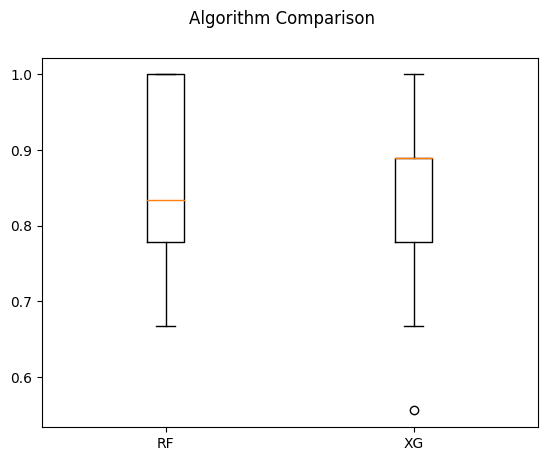

In [ ]:
models = []
models.append(('RF', RandomForestClassifier(random_state=0,max_depth=3, n_estimators=28)))
models.append(('XG', xgboost.XGBClassifier(random_state=0,max_depth=2)))



# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=0, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=008b30f3-1127-48f8-a4b4-f5cb6476cfc1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>